# Initialize

In [37]:
import os
from time import *

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys 
sys.path.append('..\\')
from scresonators.fit_resonator.ana_resonator import ResonatorFitter
from scresonators.fit_resonator.ana_resonator import ResonatorData

from scresonators.measurement import vna_measurement
from scresonators.measurement import helpers
from scresonators.measurement import vna_scan
%load_ext autoreload
%autoreload 2

helpers.config_figs()

import scresonators.measurement.vna_measurement
from scresonators.measurement.ZNB import ZNB20

VNA = ZNB20(address='10.108.30.65') # Stanford
#VNA = ZNB20(address='192.168.137.84') # SLAC

## Daily measurement settings
warm_att = 0 #dB
cold_att = 50

spar = 's43'

base_path = r'G:/My Drive/Projects/Materials/Data/250518-ResSil6Ta3'
if not os.path.exists(base_path):
    os.makedirs(base_path)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
VNA.reset()

# Single power scans

## Single scan

Calculated line delay: -4.6868206455704096e-07


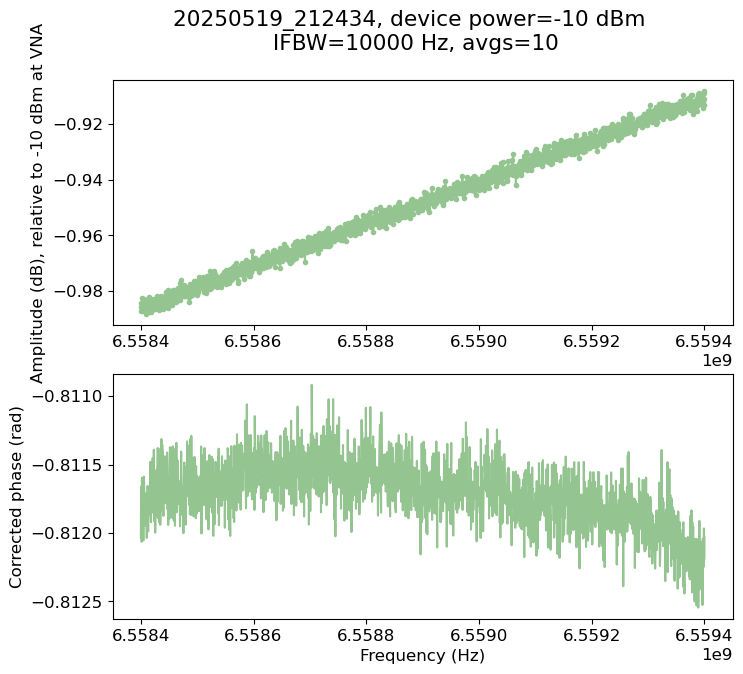

In [62]:
expt_path = base_path
spar='s43'
scan_def = {'freq_center':6.5589e9, 
            'span':1e6,  
            'bandwidth':10000, 
            'power':-10, 
            'npoints':2000, 
            'averages':10}
#file_name = 'res_' + str(freq_center)[:7] + '_' + str(power)[1:] + 'dbm'
file_name = 'wide_scan2'
data=vna_scan.do_vna_scan(VNA, file_name, expt_path, scan_def, spar)

# 5.986213520, 6.264641450, 6.418856885, 6.570072000, 6.8067, 7.085925, 7.1553305, 7.3837534, 7.589974, 7.754795

In [63]:
data

{'series': '20250519_212434',
 'amps': array([-0.9843, -0.9871, -0.9859, ..., -0.9112, -0.9132, -0.909 ]),
 'phases': array([-0.812 , -0.8119, -0.8123, ..., -1.2802, -1.2806, -1.2807]),
 'freqs': array([6.5584e+09, 6.5584e+09, 6.5584e+09, ..., 6.5594e+09, 6.5594e+09,
        6.5594e+09]),
 'vna_power': -10,
 'power_at_device': -10,
 'bandwidth': 10000,
 'averages': 10,
 'npoints': 2000}

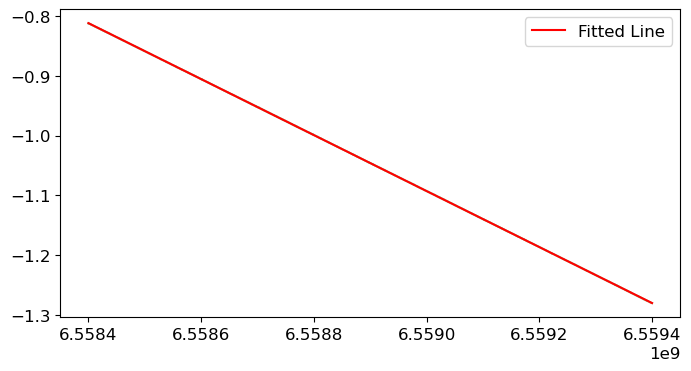

In [64]:
from scipy.stats import linregress

plt.figure()
plt.plot(data['freqs'], np.unwrap(data['phases']))

# Fit the data to a line
slope, intercept, r_value, p_value, std_err = linregress(data['freqs'], np.unwrap(data['phases']))

# Plot the fitted line
plt.plot(data['freqs'], slope * data['freqs'] + intercept, label='Fitted Line', color='red')
plt.legend()
plt.show()
#config.update_config(cfg_path, 'readout', qi, 'phase_const', slope)

In [65]:
slope

-4.6912118164934637e-07

# Broad frequency scan looking for resonances 

In [40]:
expt_path = base_path
span=50e6
power = 0
avgs = 3

d=[]
bandwidth=5000
freq_min=6.0e9
freq_max = 8.1e9 
nscans = int(np.ceil((freq_max - freq_min)/span))
for i in range(nscans):
    freq_center = freq_min + i*span
    scan_def = {'freq_center':freq_center, 
                'span':span,  
                'bandwidth':bandwidth, 
                'power':power, 
                'npoints':10000, 
                'averages':avgs}
    file_name = 'res_' + str(freq_center)[:7] + '_' + str(power)[1:] + 'dbm'
    d.append(vna_scan.do_vna_scan(VNA, file_name, expt_path, scan_def, spar, plot=False))

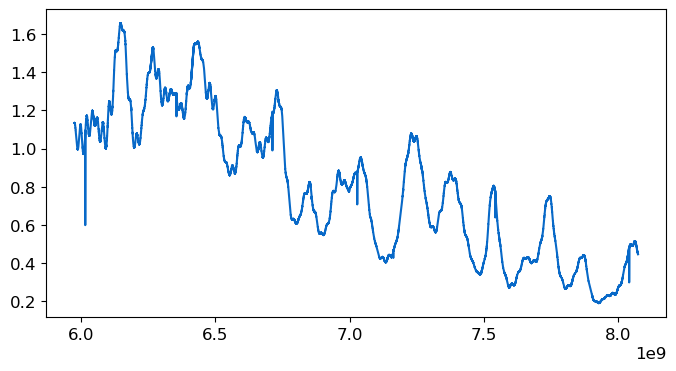

In [41]:
dd = helpers.concat_scans(d)
dd['amps'] = helpers.make_lin(dd['amps'])
plt.figure()
plt.plot(dd['freqs'],dd['amps'])

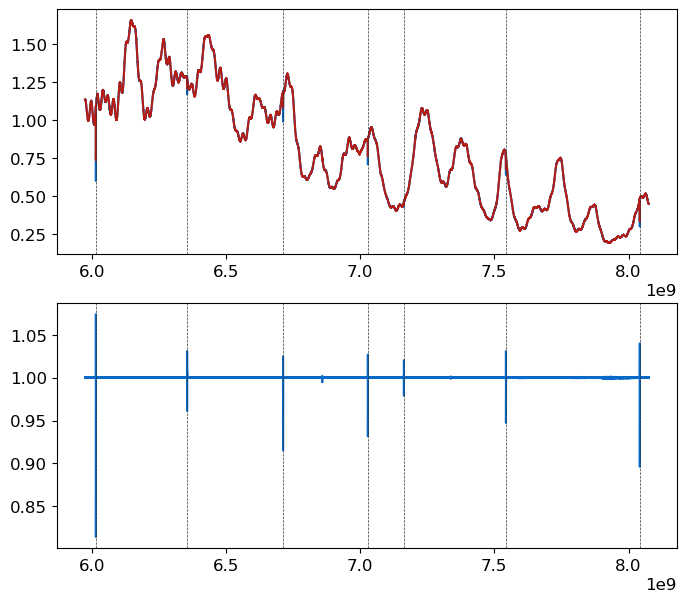

In [47]:
data = helpers.find_peaks(dd, 0.025)

In [ ]:
print(data['coarse_peaks'])



[6.0155e+09 6.3552e+09 6.7128e+09 7.0288e+09 7.1631e+09 7.5432e+09
 8.0420e+09]


# Check resonators at one power 

Calculated line delay: -2.2156061523602942e-07


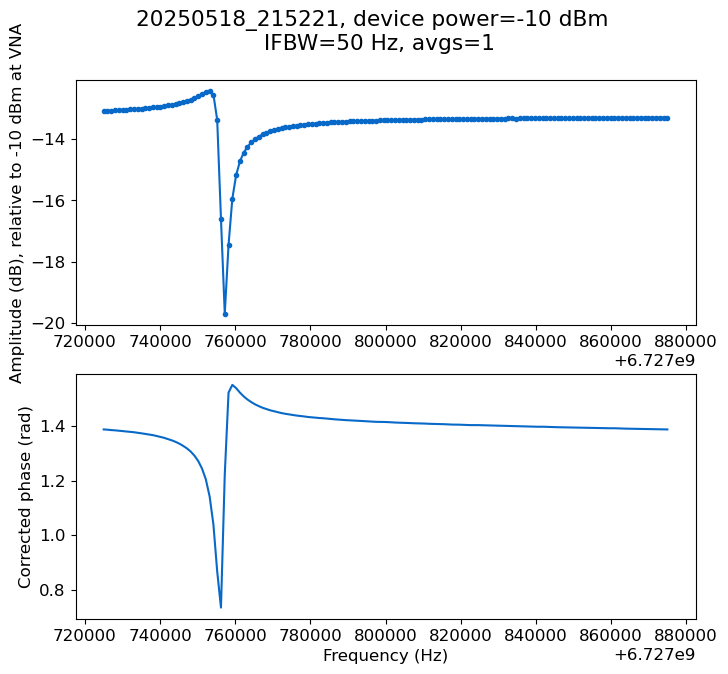

Calculated line delay: -2.5781364499111483e-07


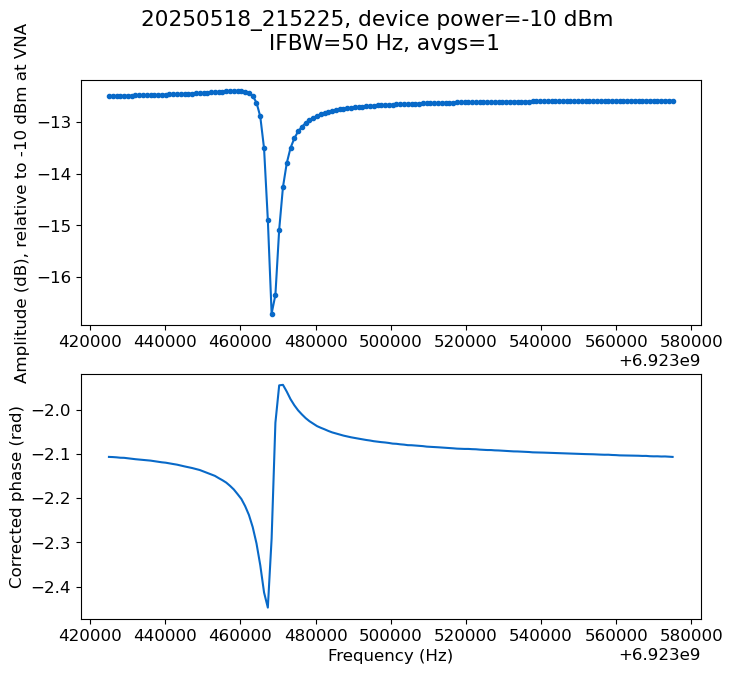

Calculated line delay: -3.015040615722749e-07


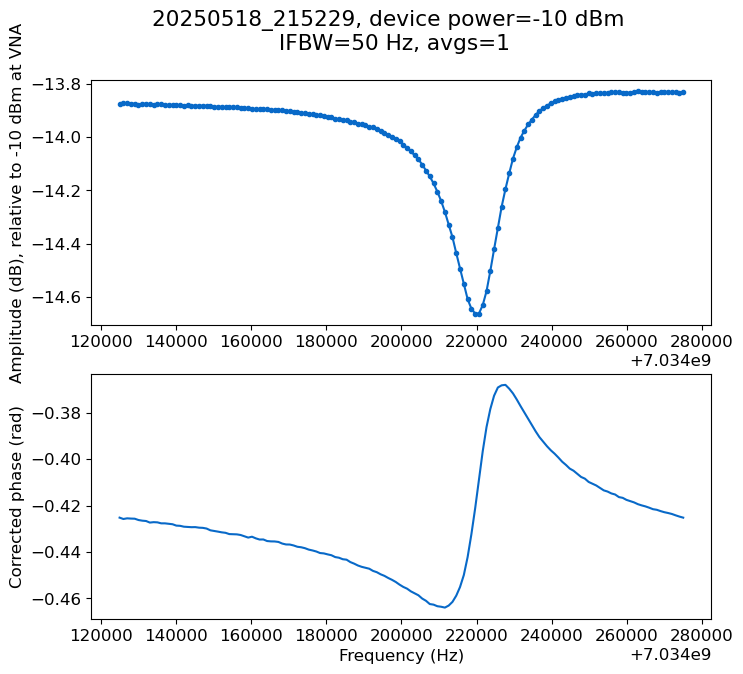

In [10]:
%matplotlib inline
expt_path = base_path
npoints = 150
span=0.15e6
power = -10

freqs = np.array([6.0175e+09, 6.3510e+09, 6.7120e+09, 7.0296e+09, 7.1744e+09, 7.5467e+09])
freqs =np.array([6.7278e+09, 6.9235e+09, 7.0342e+09])
bandwidth=50
avgs=1
for freq_center in freqs:     
    scan_def = {'freq_center':freq_center, 'span':span,  'bandwidth':bandwidth, 'power':power, 'npoints':npoints, 'averages':avgs}
    file_name = 'res_' + str(freq_center)[:7] + '_' + str(power)[1:] + 'dbm'
    vna_scan.do_vna_scan(VNA, file_name, expt_path, scan_def, spar)

## Medium width scan checking each resonance 
Saves the minimum value of transmission to res_freqs for narrower scan next. 

Calculated line delay: -4.7000929933846257e-07


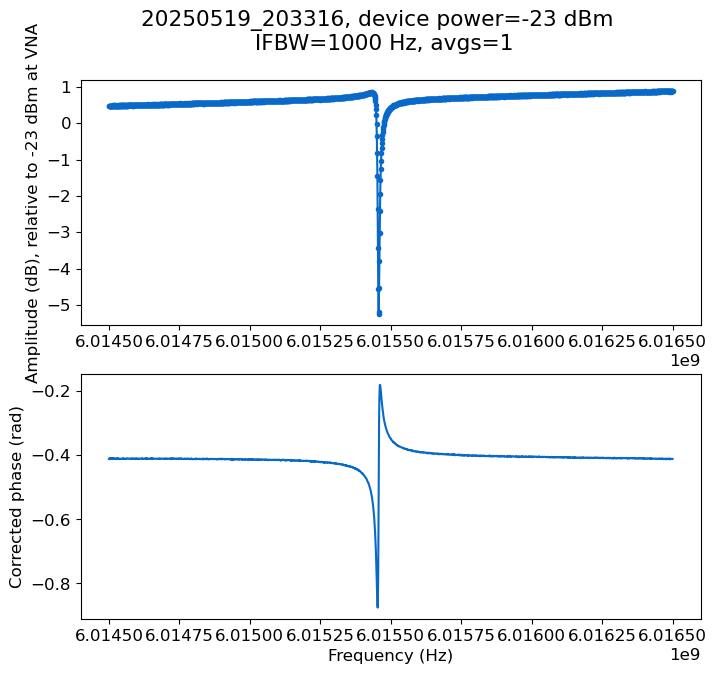

Calculated line delay: -4.7535818147707787e-07


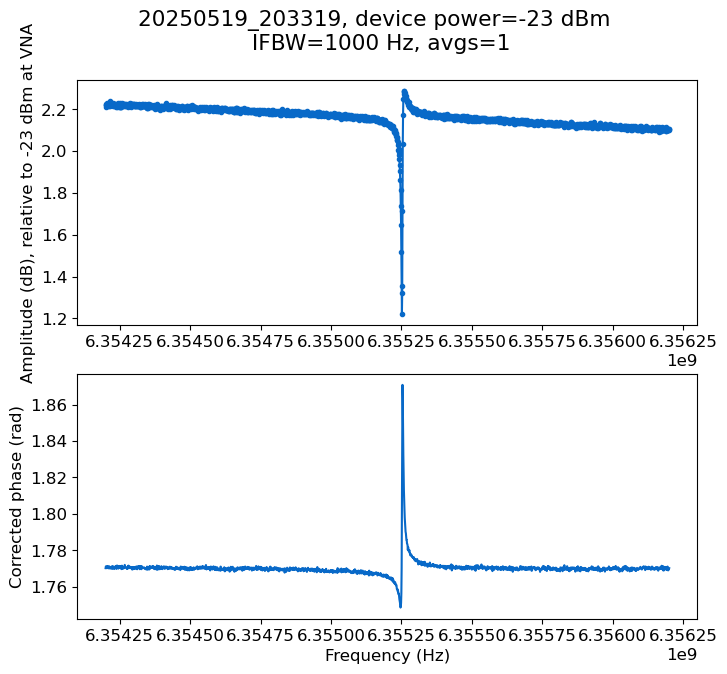

Calculated line delay: -4.801414776284931e-07


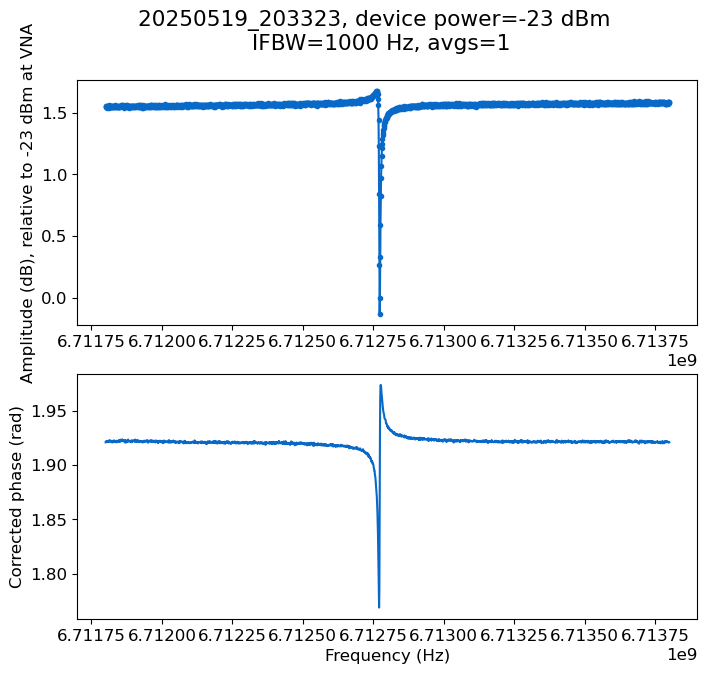

Calculated line delay: -4.784414686640733e-07


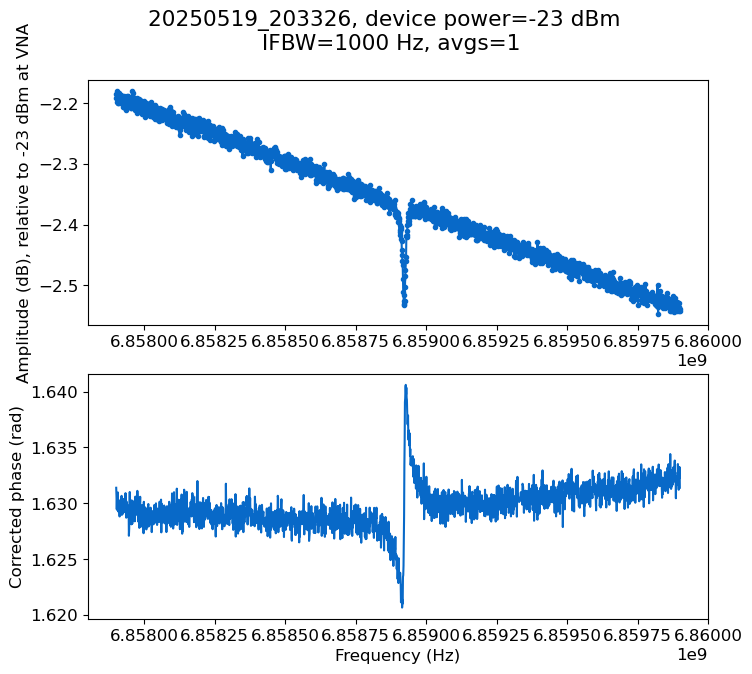

Calculated line delay: -4.7401060854893736e-07


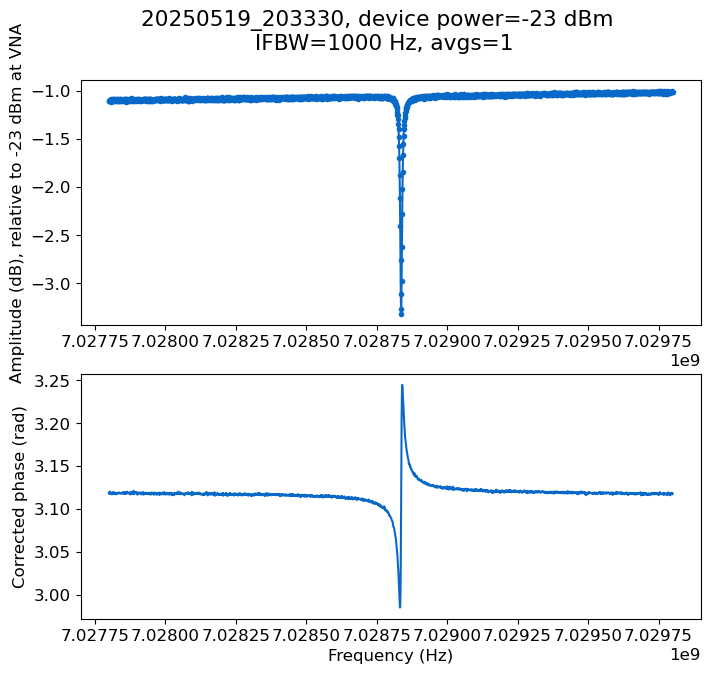

Calculated line delay: -4.5943145905279263e-07


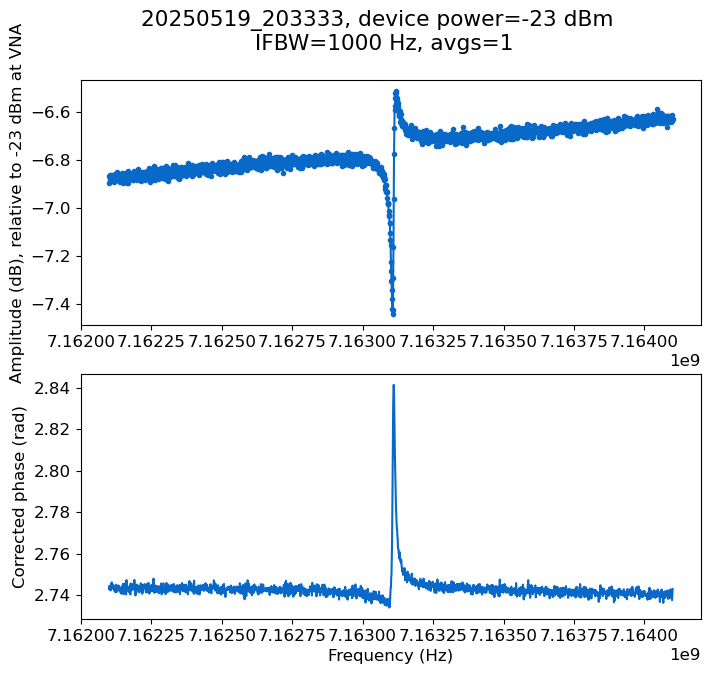

Calculated line delay: -5.04974206962091e-07


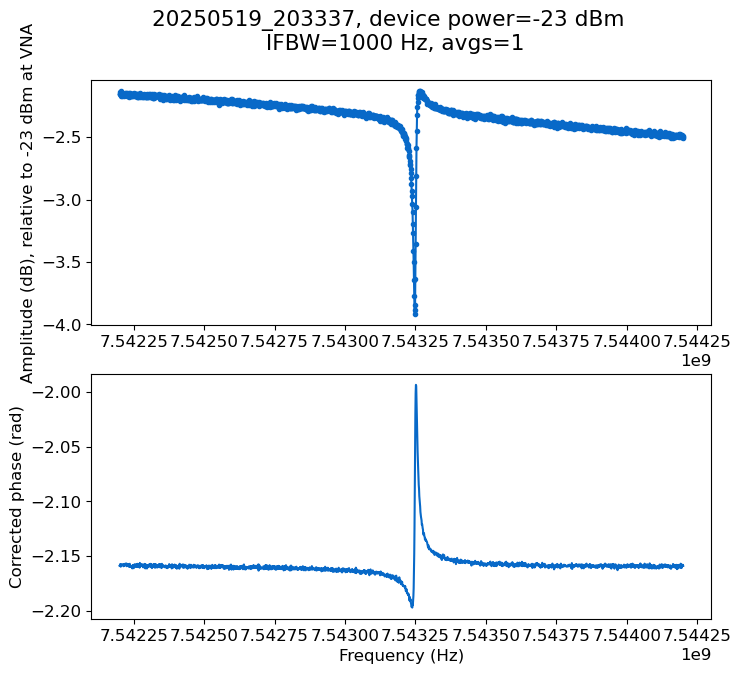

Calculated line delay: -4.917258738435183e-07


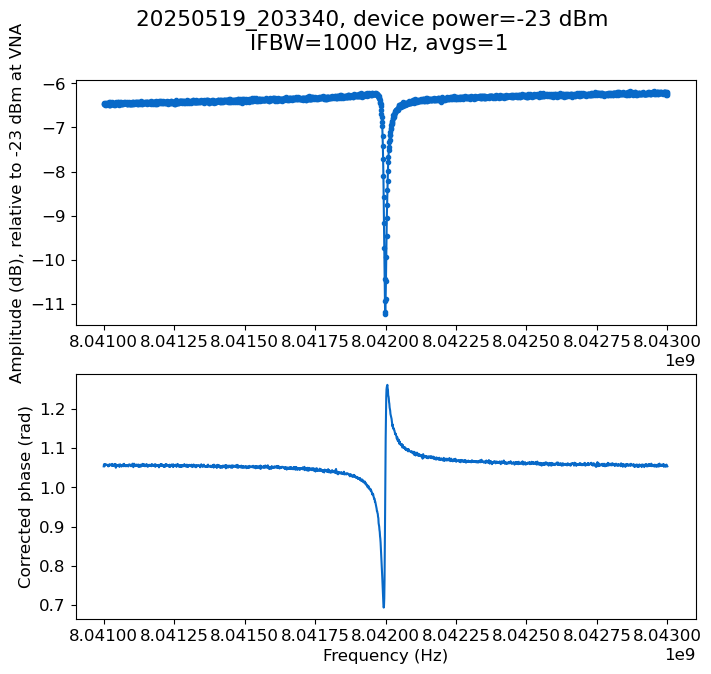

In [54]:
freqs = np.array([6.0175e+09, 6.3510e+09, 6.7120e+09, 7.0296e+09, 7.1744e+09, 7.5467e+09])
freqs =np.array([6.7278e+09, 6.9235e+09, 7.0342e+09,8.0683e+09])
freqs = np.array([6.0155e+09, 6.3552e+09, 6.7128e+09,6.8589e9, 7.0288e+09, 7.1631e+09, 7.5432e+09,
 8.0420e+09])
expt_path = base_path
span=2e6
res_freqs =[]
for freq_center in freqs:
    scan_def = {'freq_center':freq_center, 'span':span,  'bandwidth':1000, 'power':-23, 'npoints':2000, 'averages':1}
    file_name = 'res_' + str(freq_center)[:7] + '_' + str(power)[1:] + 'dbm'
    data=vna_scan.do_vna_scan(VNA, file_name, expt_path, scan_def, spar)
    res_freqs.append(data['freqs'][np.argmin(data['amps'])])

## Narrower scan before power sweep

Calculated line delay: 6.227218152458114e-07


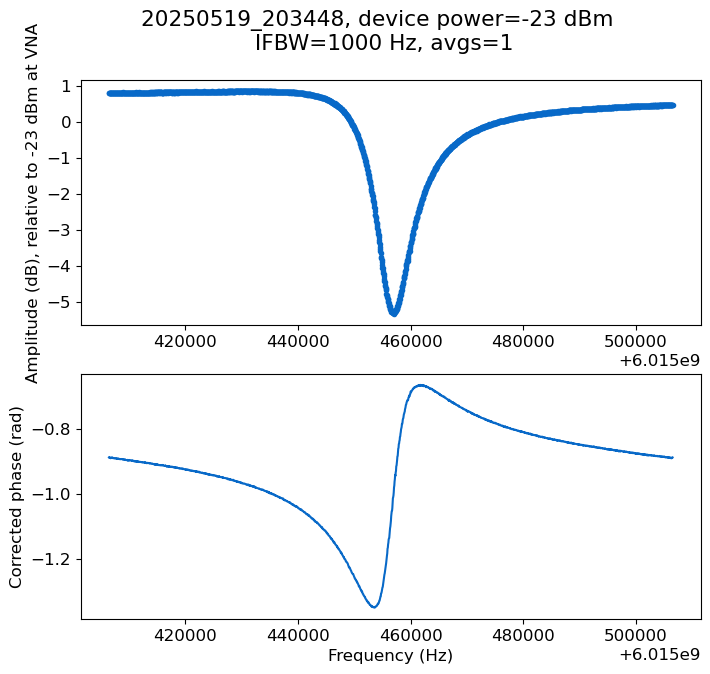

Calculated line delay: -3.8613809157948213e-07


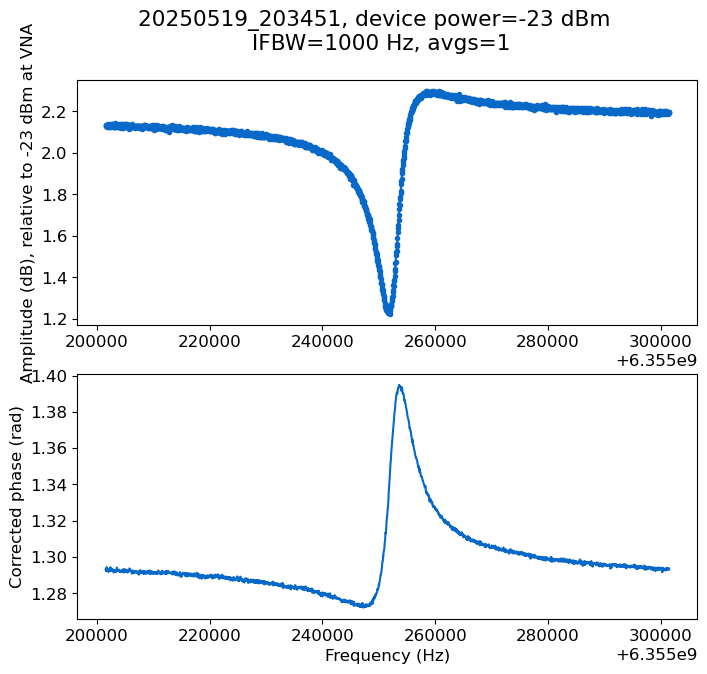

Calculated line delay: -2.994421680004834e-07


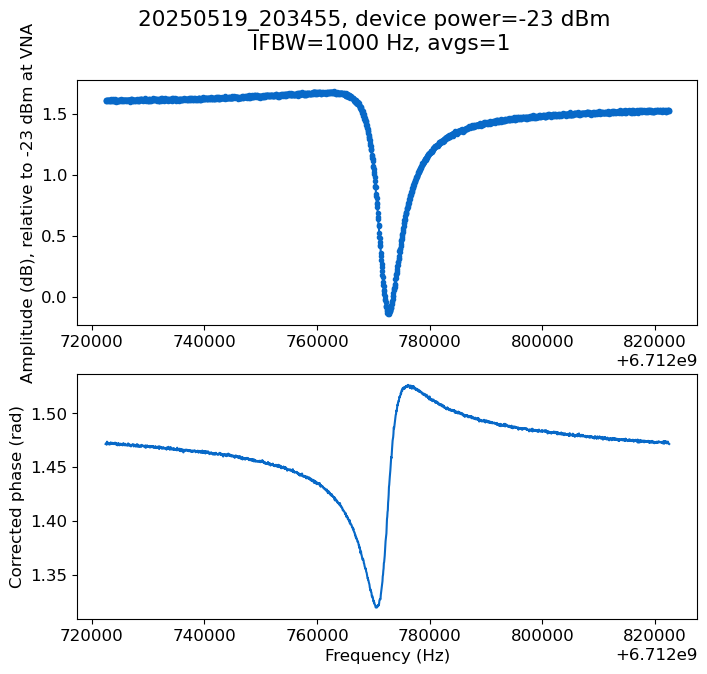

Calculated line delay: -4.949565028093681e-07


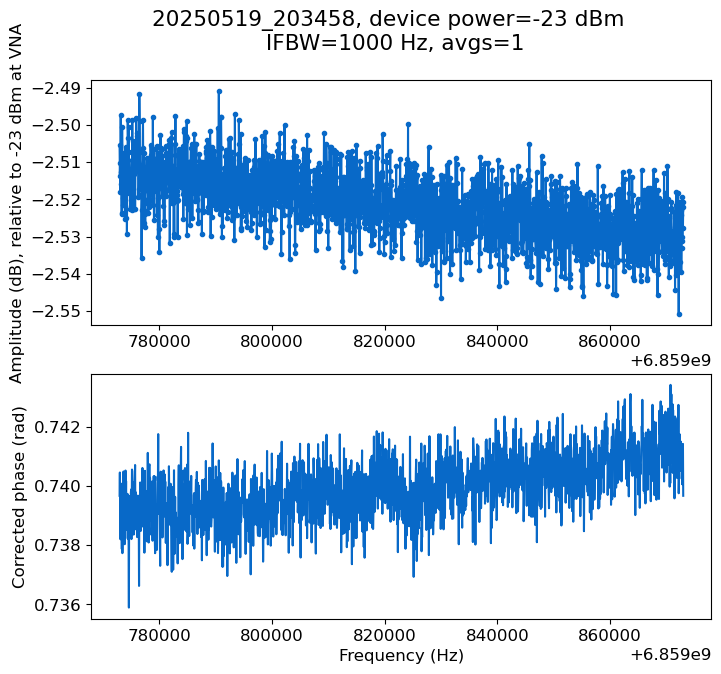

Calculated line delay: -4.6600990056111524e-08


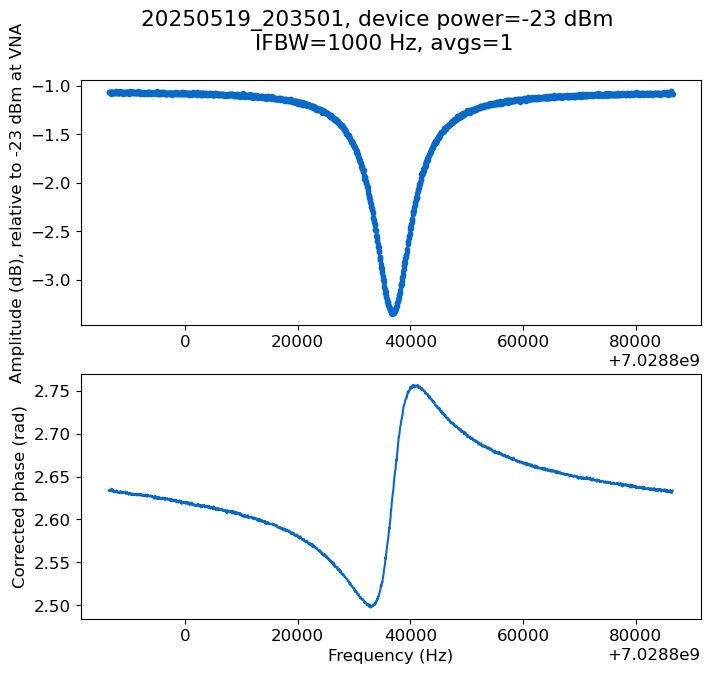

Calculated line delay: -3.6937410982305965e-07


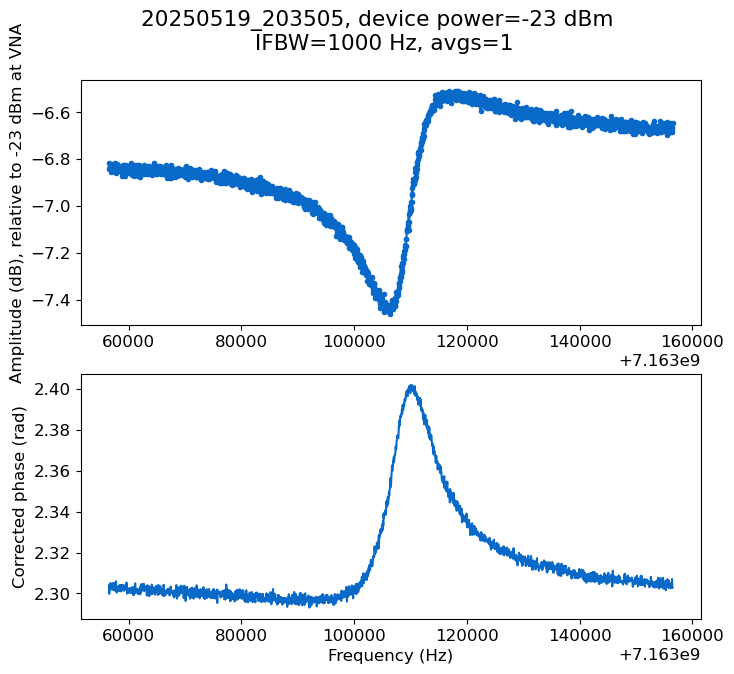

Calculated line delay: -1.9225276540409283e-07


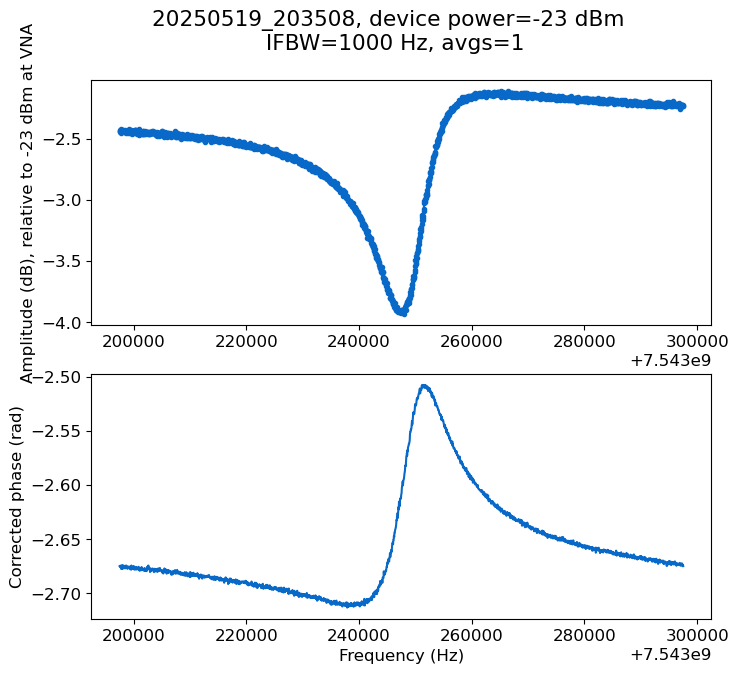

Calculated line delay: 7.282411016006785e-07


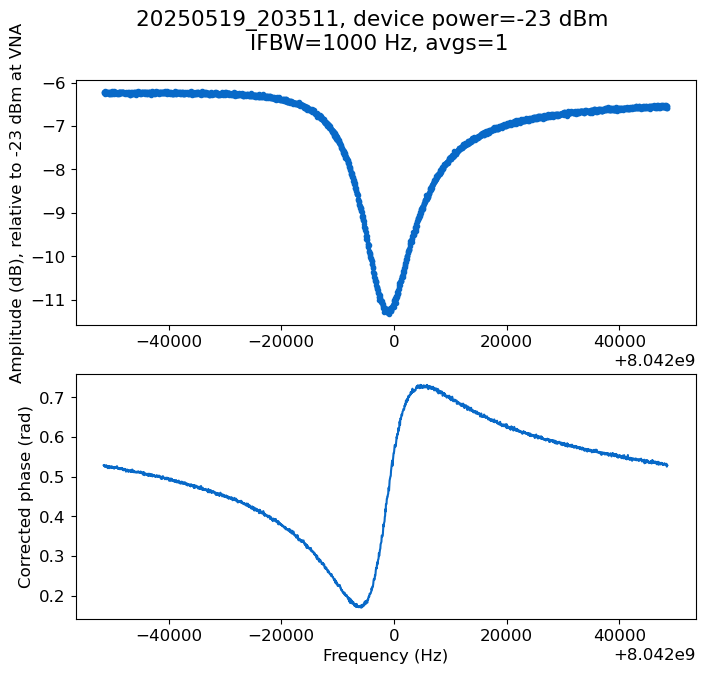

In [55]:
freq_list =[]
scan_def['span']=1e5
for res in res_freqs:
    scan_def['freq_center'] = res
    file_name = 'res_' + str(freq_center)[:7] + '_' + str(power)[1:] + 'dbm'
    data=vna_scan.do_vna_scan(VNA, file_name, expt_path, scan_def, spar)
    freq_list.append(data['freqs'][np.argmin(data['amps'])])

In [56]:
freq_list

[6015457003.501751,
 6355251900.950475,
 6712772761.38069,
 6859872161.080541,
 7028836743.371686,
 7163106428.2141075,
 7543248049.024512,
 8041999124.562282]

# Power sweep

{'base_path': 'G:/My Drive/Projects/Materials/Data/250518-ResSil6Ta3', 'folder': 'power_sweep_20250519_211232', 'freqs': array([6.0155e+09, 6.3553e+09, 6.7128e+09, 6.8599e+09, 7.0288e+09,
       7.1631e+09, 7.5432e+09, 8.0420e+09]), 'span_inc': 8, 'kappa_start': 30000, 'nvals': 21, 'pow_start': 0, 'pow_inc': -5, 'npoints': 25, 'npoints1': 10, 'npoints2': 27, 'bandwidth': 20, 'averages': 1, 'att': 65, 'type': 'single', 'freq_0': 6, 'db_slope': 7, 'spar': 's43', 'avg_corr': 0.03}


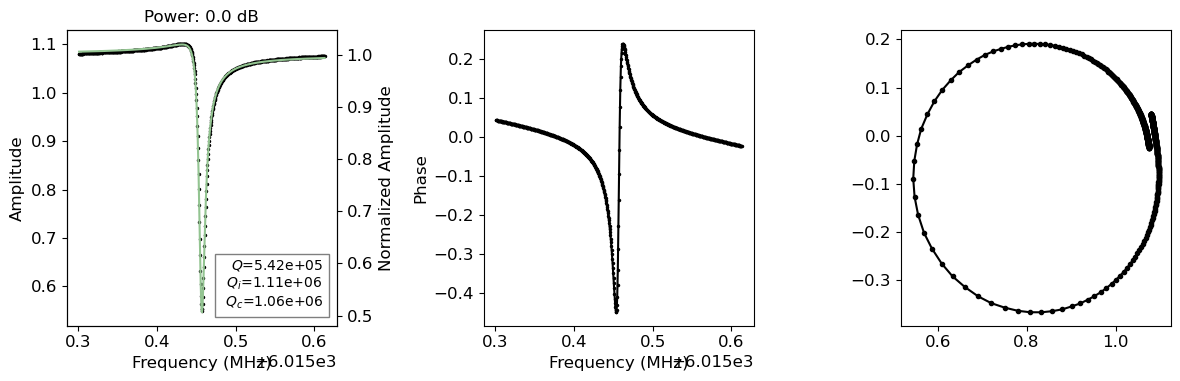

Time elapsed: 0.32 min, expected time: 0.03 min


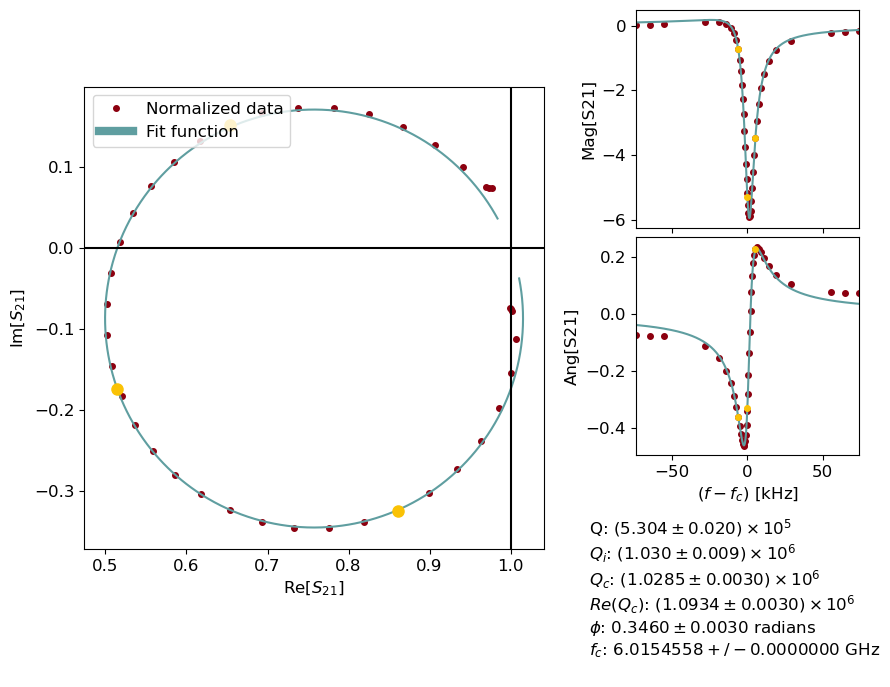

Tau proportionality: 0.000
Pin -65.0, N photons: 1.13e+09, navg: 0
Next time: 0.00 min, q_adj: 0.900
Time elapsed: 0.32 min, expected time: 0.03 min


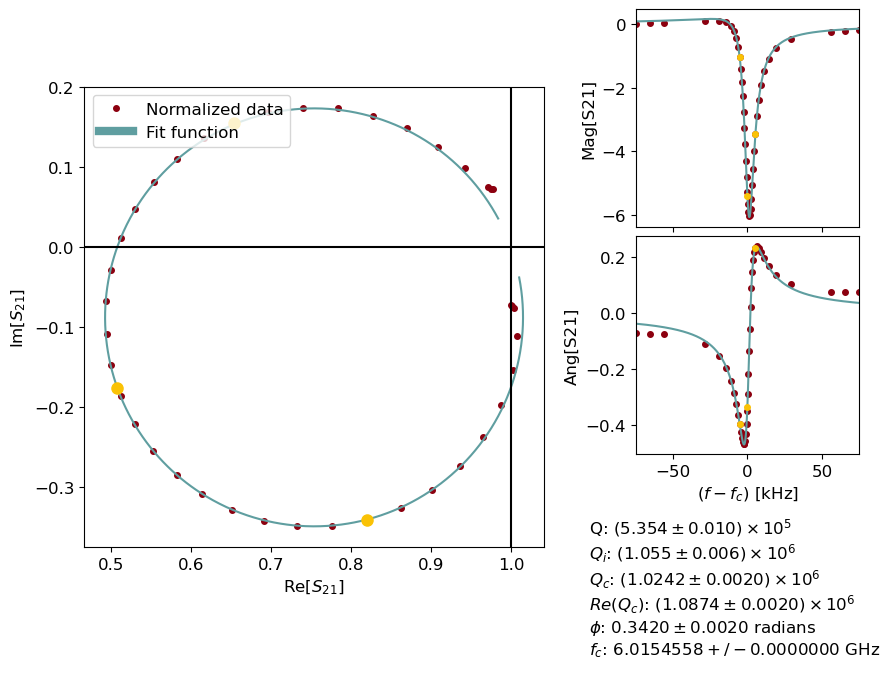

Tau proportionality: 0.000
Pin -70.0, N photons: 3.65e+08, navg: 0
Next time: 0.00 min, q_adj: 1.008
Time elapsed: 0.32 min, expected time: 0.03 min


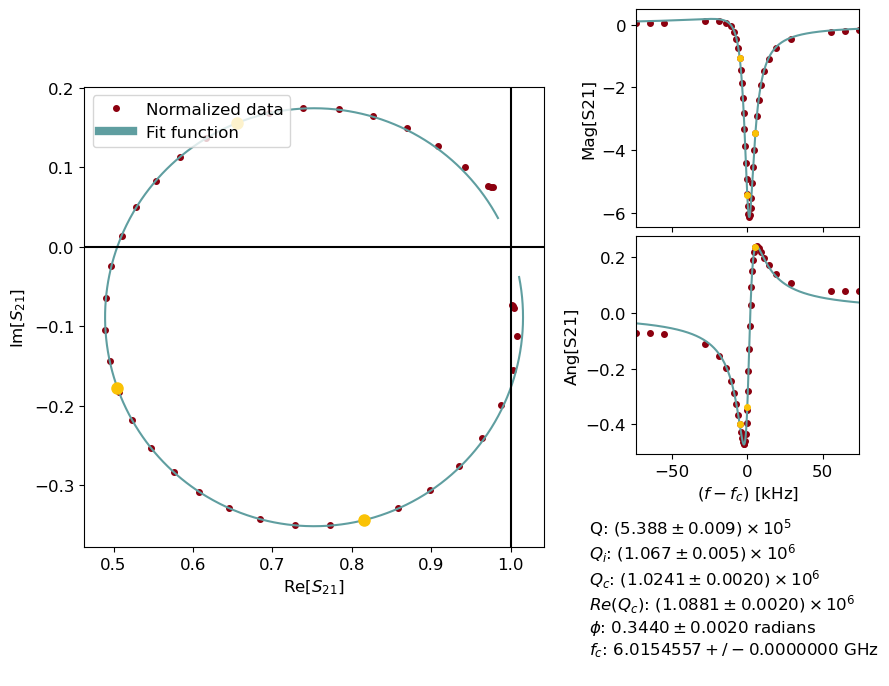

Tau proportionality: 0.001
Pin -75.0, N photons: 1.17e+08, navg: 0
Next time: 0.00 min, q_adj: 1.007
Time elapsed: 0.33 min, expected time: 0.03 min


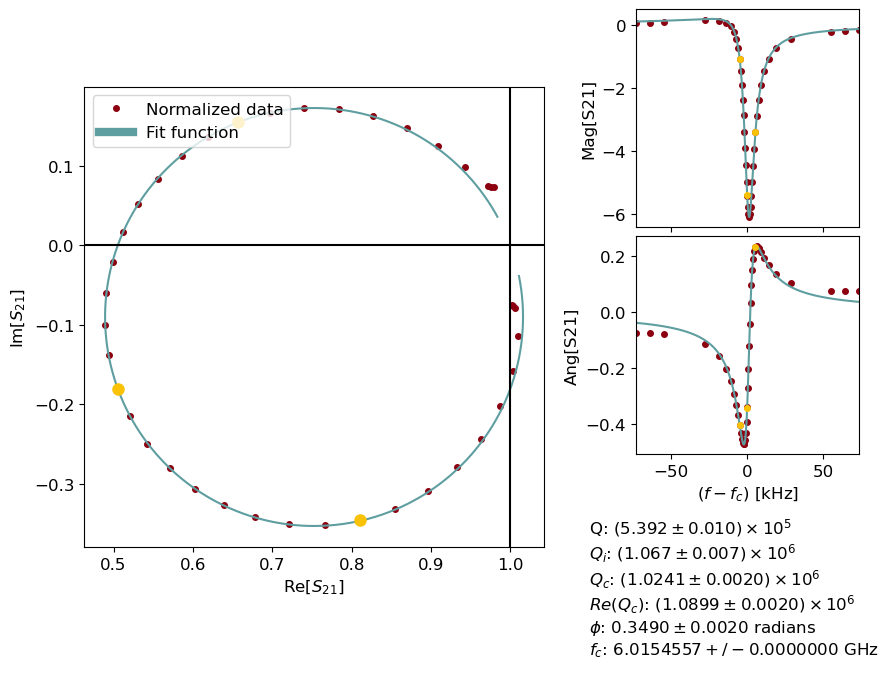

Tau proportionality: 0.004
Pin -80.0, N photons: 3.69e+07, navg: 0
Next time: 0.00 min, q_adj: 0.998
Time elapsed: 0.33 min, expected time: 0.03 min


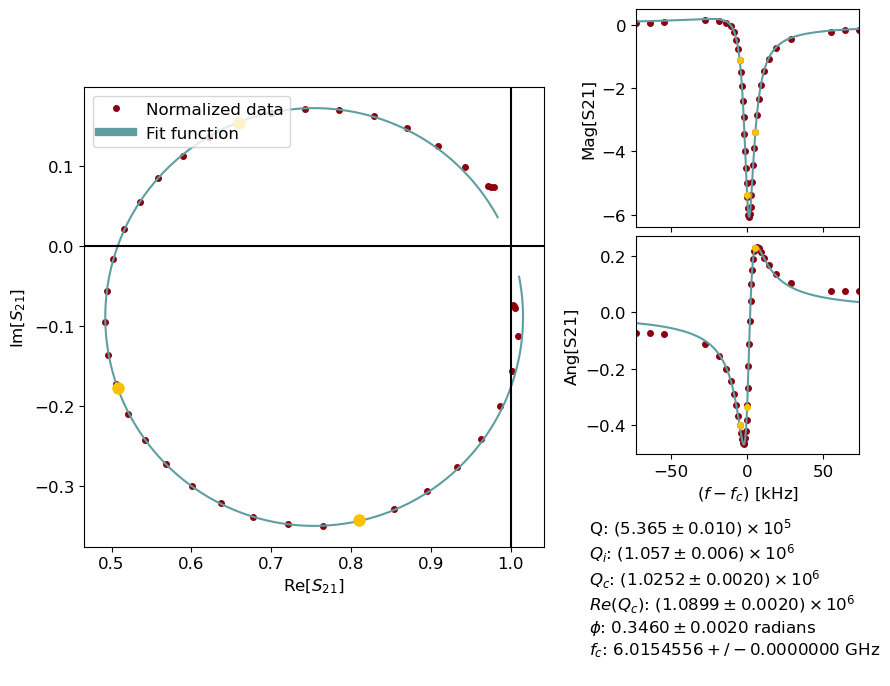

Tau proportionality: 0.012
Pin -85.0, N photons: 1.16e+07, navg: 0
Next time: 0.00 min, q_adj: 0.996
Time elapsed: 0.21 min, expected time: 0.02 min


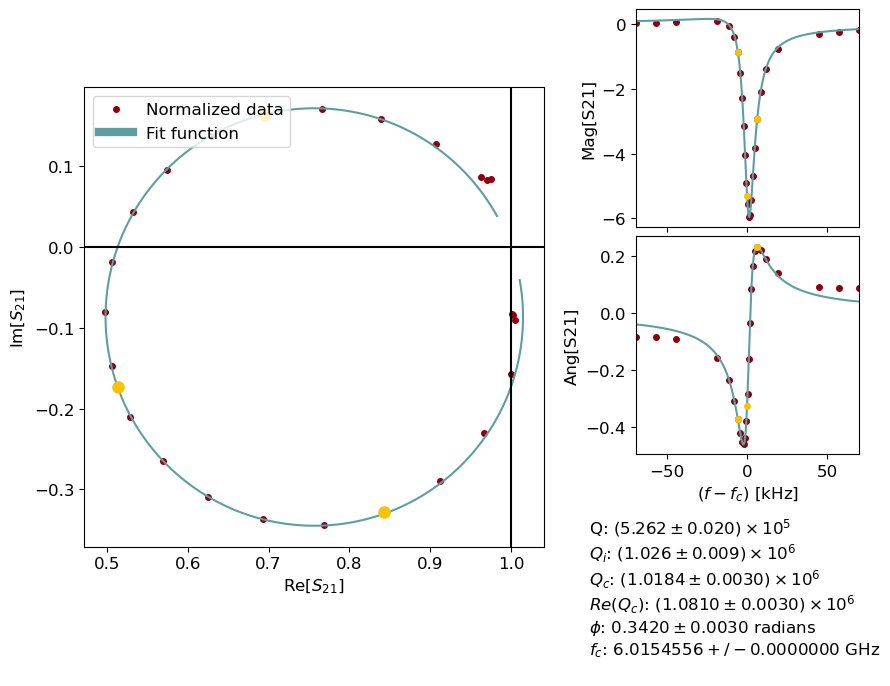

Tau proportionality: 0.039
Pin -90.0, N photons: 3.56e+06, navg: 0
Next time: 0.00 min, q_adj: 0.986
Time elapsed: 0.21 min, expected time: 0.02 min


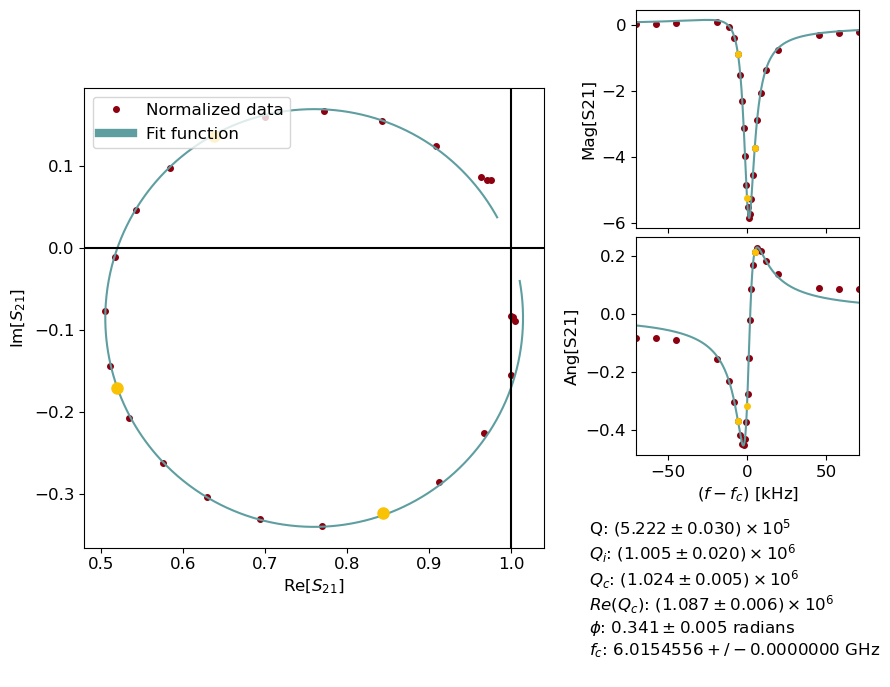

Fit parameters: [    813.0459 1055449.3049      18.4546       1.8412]
Tau proportionality: 0.127
Pin -95.0, N photons: 1.09e+06, navg: 0
Next time: 0.00 min, q_adj: 0.987
Time elapsed: 0.21 min, expected time: 0.02 min


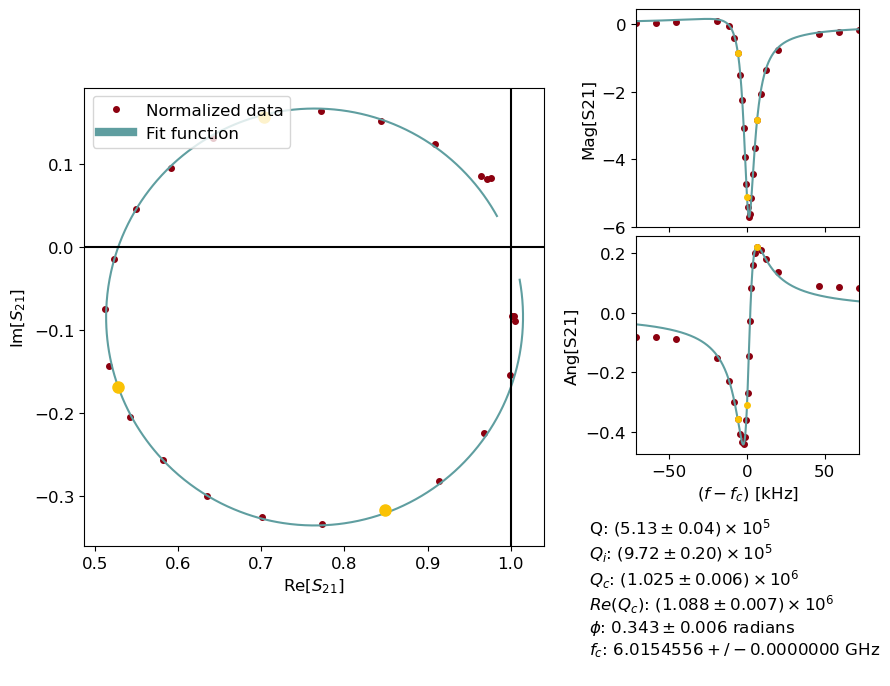

Fit failed: Optimal parameters not found: Number of calls to function has reached maxfev = 1000.
Tau proportionality: 0.412
Pin -100.0, N photons: 3.35e+05, navg: 0
Next time: 0.00 min, q_adj: 0.984
Time elapsed: 0.21 min, expected time: 0.02 min
Qi err: 0.003361462042428948


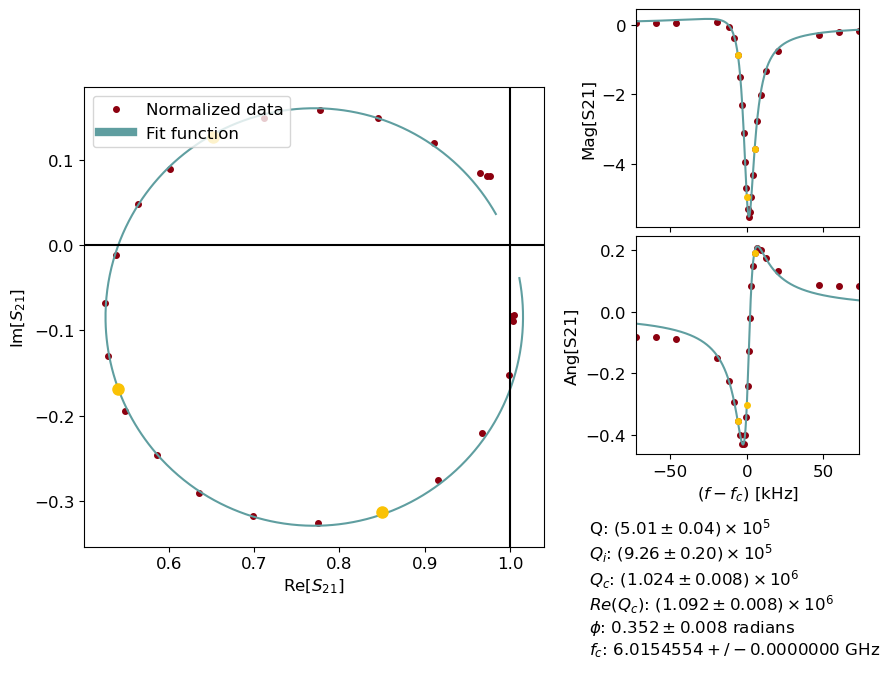

Fit parameters: [6472353.018  1056414.2622  196765.0723       1.4319]
Tau proportionality: 1.369
Pin -105.0, N photons: 1.01e+05, navg: 0
Next time: 0.00 min, q_adj: 0.976
Time elapsed: 0.21 min, expected time: 0.02 min
Qi err: 0.005263786512015098


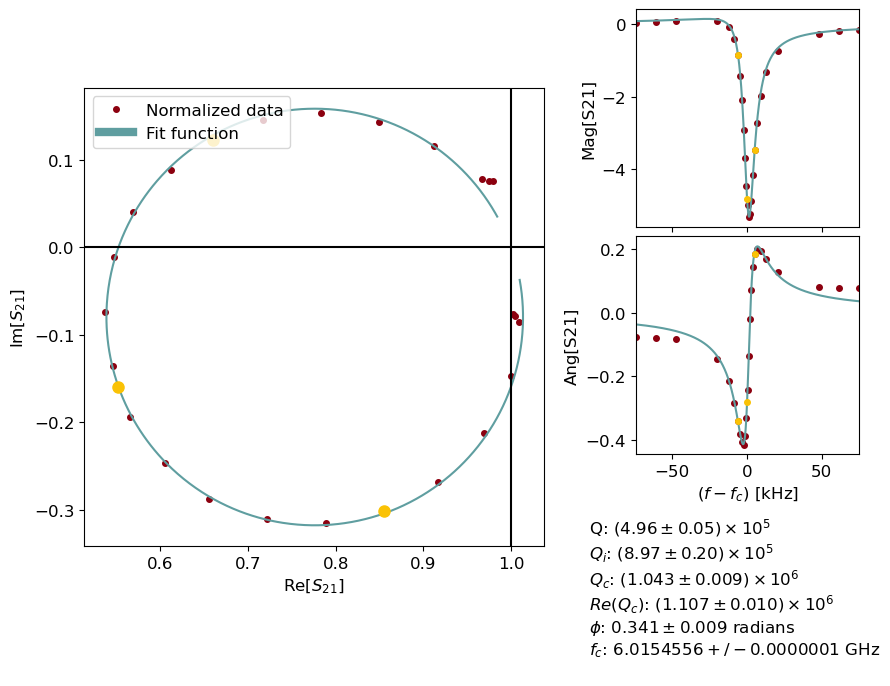

Fit parameters: [5626573.1361 1056990.9228  131474.9646       1.3048]
Tau proportionality: 4.575
Pin -110.0, N photons: 3.02e+04, navg: 0
Next time: 0.00 min, q_adj: 0.973
Time elapsed: 0.21 min, expected time: 0.02 min
Qi err: 0.00794873031864048


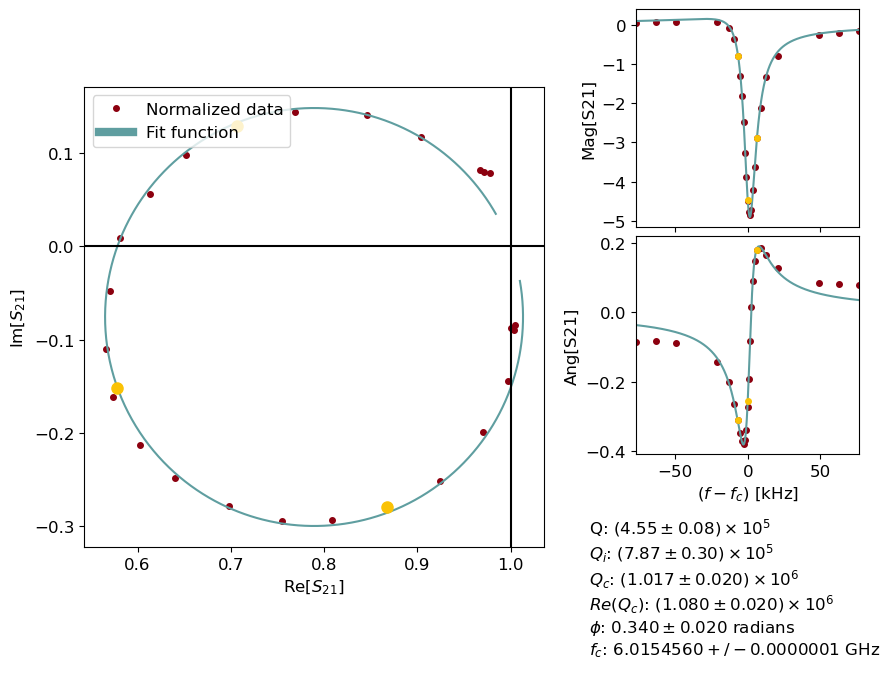

Fit failed: Optimal parameters not found: Number of calls to function has reached maxfev = 1000.
Tau proportionality: 16.364
Pin -115.0, N photons: 8.44e+03, navg: 1
Next time: 0.02 min, q_adj: 0.940
Time elapsed: 0.21 min, expected time: 0.02 min
Qi err: 0.012354717023902402


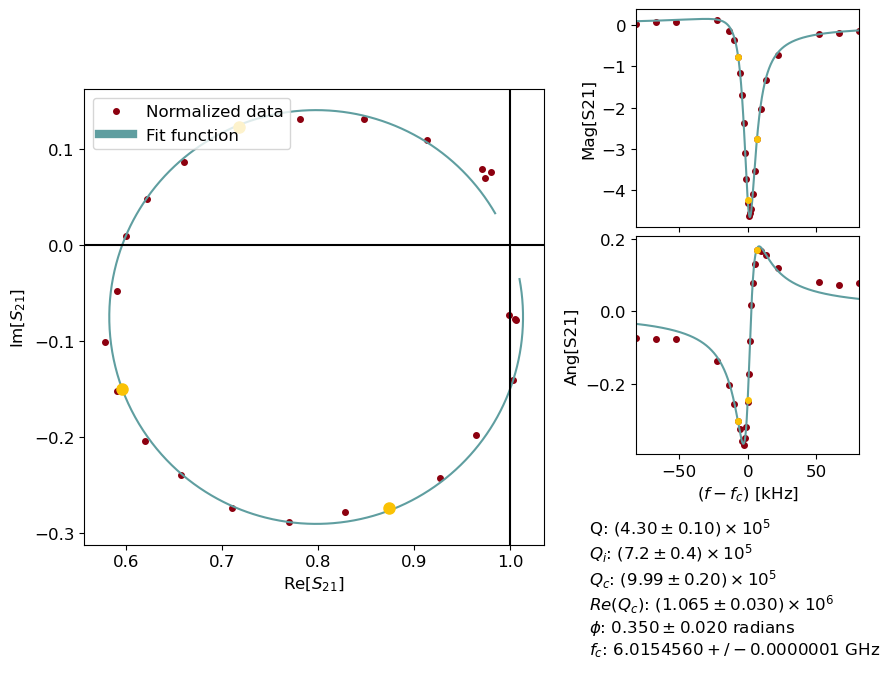

Fit parameters: [1418003.4919 1061970.8115    1505.6793       0.8158]
Tau proportionality: 55.444
Pin -120.0, N photons: 2.49e+03, navg: 2
Next time: 0.04 min, q_adj: 0.966
Time elapsed: 0.23 min, expected time: 0.04 min
Qi err: 0.010869540256920433


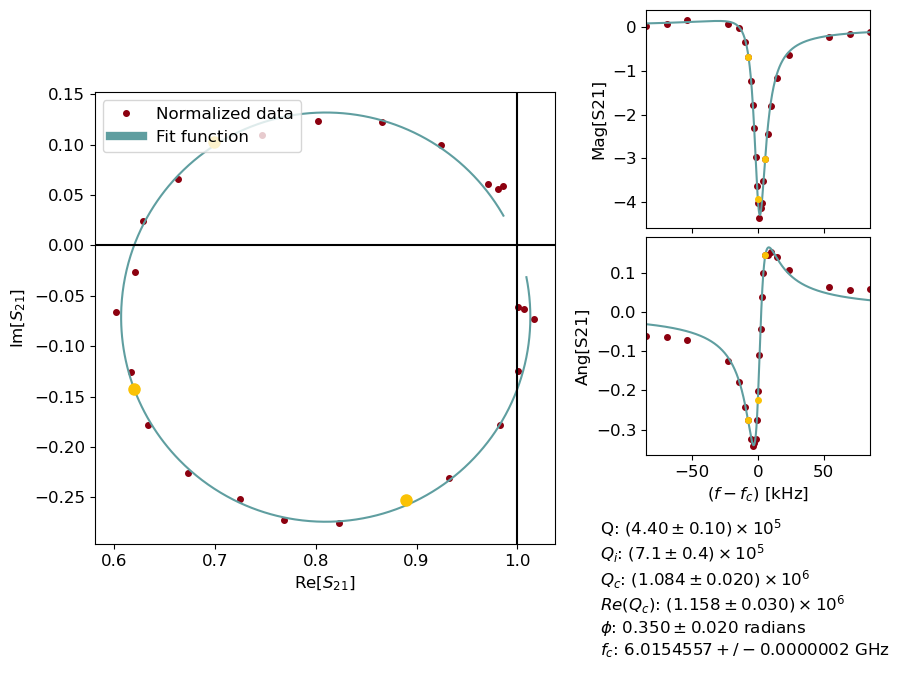

Fit parameters: [1913375.5176 1058796.334     4544.8009       0.9137]
Tau proportionality: 198.006
Pin -125.0, N photons: 697, navg: 8
Next time: 0.17 min, q_adj: 0.941
Time elapsed: 0.36 min, expected time: 0.17 min
Qi err: 0.009435521133906279


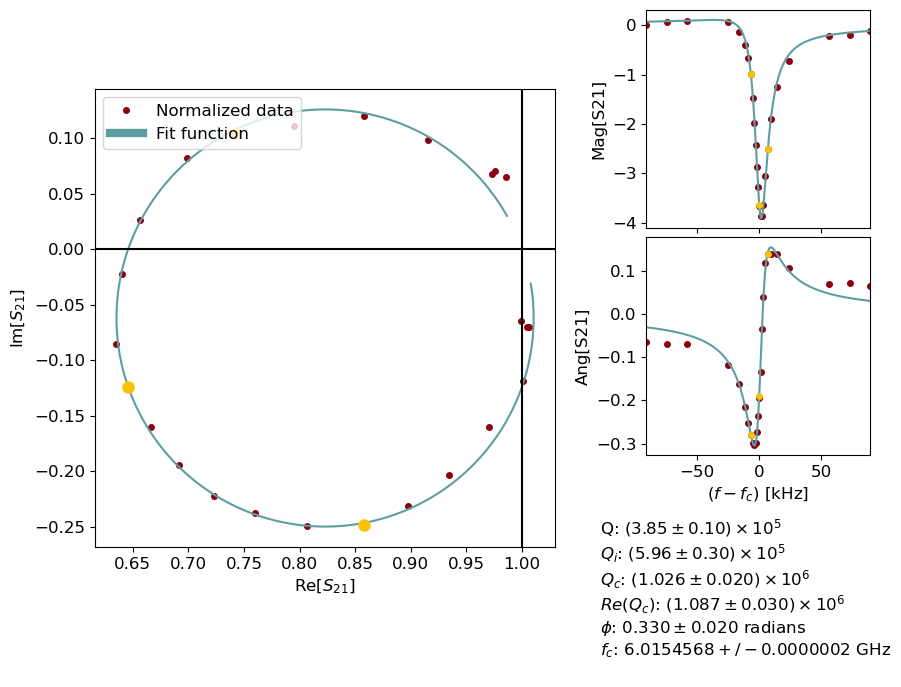

Fit parameters: [1187548.7898 1069675.8443     508.4227       0.6868]
Tau proportionality: 752.731
Pin -130.0, N photons: 183, navg: 36
Next time: 0.75 min, q_adj: 0.912
Time elapsed: 0.97 min, expected time: 0.75 min
Qi err: 0.007798742220923446


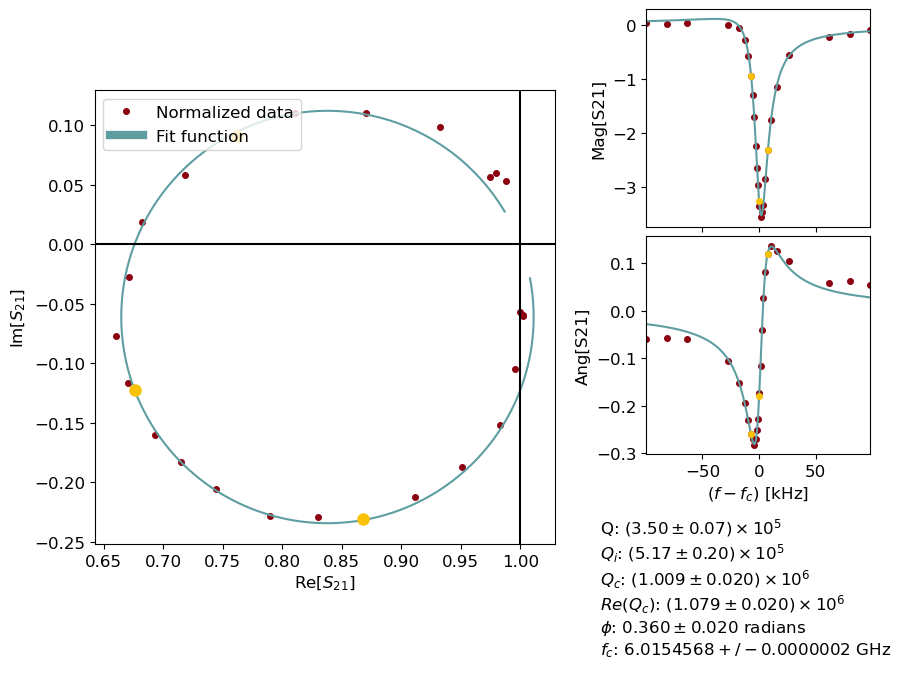

Fit parameters: [ 706377.4824 1078772.6784      39.7501       0.5791]
Tau proportionality: 2743.978
Pin -135.0, N photons: 50.3, navg: 117
Next time: 2.44 min, q_adj: 0.931
Time elapsed: 2.74 min, expected time: 2.44 min
Qi err: 0.008286376796325136


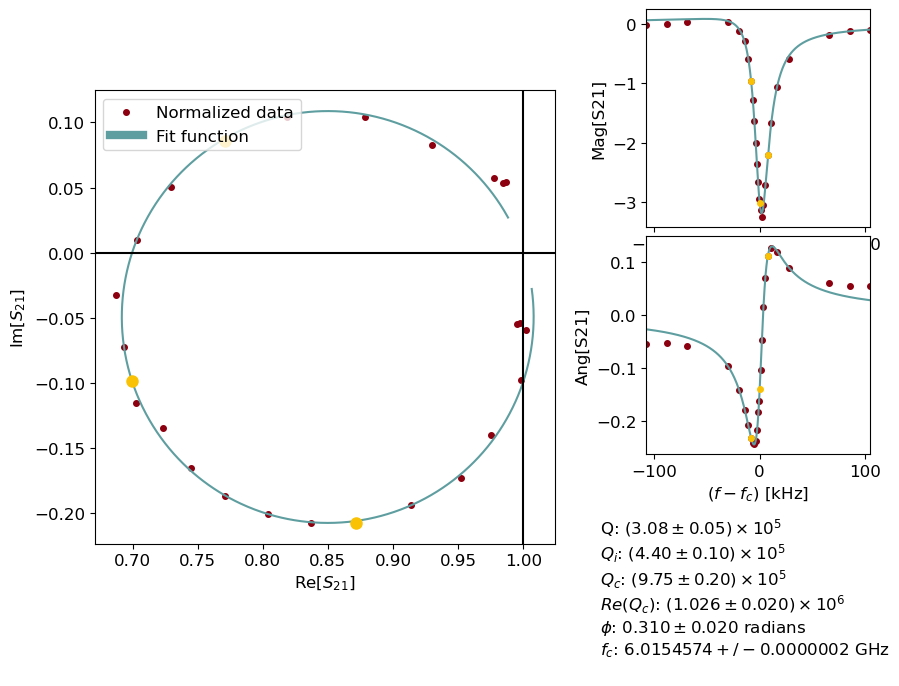

Fit parameters: [ 477434.4955 1083933.8836       5.8482       0.5375]
Tau proportionality: 10440.434
Pin -140.0, N photons: 13.2, navg: 497
Next time: 10.35 min, q_adj: 0.912


KeyboardInterrupt: 

In [ ]:
freq_list = [6017463256.628314,
 6350956653.326663,
 6711996673.336668,
 7029607078.539269,
 7174418534.267134,
 7546678814.407204]
freq_list = [6727757253.626813, 6923469659.829915, 7034221985.992996, 8068307578.789394]
freq_list = [6015457003.501751,
 6355251900.950475,
 6712772761.38069,
 6859872161.080541,
 7028836743.371686,
 7163106428.2141075,
 7543248049.024512,
 8041999124.562282]
 # single, linear 
custom_config = {"freqs":np.array(freq_list), 
                 "att":65,
                 'type':'single',#'lin',
                 'base_path':base_path, 
                 'bandwidth':20,
                 "db_slope":7,
                 'slope':-4.6912118164934637e-07,
                 "span_inc":8,
                 'nvals':21,
                 "pow_start":-0,
                 "avg_corr":0.015,
                 'spar':'s43',
                 'npoints':25}
#custom_config = {"freqs":np.array(freq_list), "att":50,'type':'lin','base_path':base_path, 'nvals':21,"pow_start":0}
    # Update default config with custom values
config = vna_measurement.get_default_power_sweep_config(custom_config)
print(config)
results = vna_measurement.power_sweep_v2(config, VNA)

## Power Sweeps

### Linear

In [ ]:
# Create the directory
%matplotlib inline
expt_path = os.path.join(base_path, 'powersweep9')
#os.makedirs(expt_path)
#5.82616211,6.078942394,6.4321482,6.6747425,6.7438394,6.90156518,7.459121,7.7149925
#
freqs = np.array([5.516760, 5.820845, 6.091775, 6.336550, 6.37702, 6.69244, 7.05642, 7.382927])*1e9


lws = np.array([50000, 45000.7040482992, 29440.44324796017, 33479.36291704487, 15733.669746968377, 14120.74423508918, 20936.47067639849, 19784.771902390334])
freqs =np.array([6336551667.277118, 6692449750.952356, 7056424624.127725, 7382937976.60123, 5516761912.680331, 5820847040.102408, 6091775283.094366, 6376983088.432415])

atten=-60
nscans = 18
powers = [-5 + (-5 * i) for i in range(nscans)]
avgs = [np.floor(1.65**i) for i in range(nscans)]
spans =  8*lws
for i, power in enumerate(powers): 
    for freq_center, span in zip(freqs, spans):
        if power+atten<-150: 
            bandwidth=20
            nb_points=70
        elif power+atten<-135:
            bandwidth=50
            nb_points=100
        elif power+atten<-100:
            bandwidth=100
            nb_points=200
        else:
            bandwidth=200
            nb_points=300
        
        if freq_center > 6.3e9 and freq_center < 6.36e9:
            curr_avg = 5*avgs[i]
        elif freq_center>=6.4e9:
            curr_avg = 3*avgs[i]
        else:
            curr_avg = 1*avgs[i]
        
        scan_def = {'freq_center':freq_center, 'span':span,  'bandwidth':bandwidth, 'power':powers[i], 'nb_points':int(nb_points), 'averages':curr_avg}
        file_name = 'res_' + str(freq_center)[:7] + '_' + str(power)[1:] + 'dbm'
        do_vna_scan(file_name, expt_path, scan_def)

### Multiple Linear

In [ ]:
expt_path = os.path.join(base_path, 'powersweep8')
os.makedirs(expt_path)
%matplotlib inline
powers = [-20 + (-5 * i) for i in range(18)]
avgs = [np.floor(1.6**i) for i in range(18)]
vary_param = 'power'

spans = lws * 6
wid = 0.37 # This is the width of non center section (whyyy)
atten=-60
for i, power in enumerate(powers): 
    if atten+power<-150: 
        bandwidth=40
        nb_points=40
    elif atten+power<-130:
        bandwidth=50
        nb_points=45
    elif atten+power<-100:
        bandwidth=100
        nb_points=60
    else:
        bandwidth=200
        nb_points=90
    
    tm = 4*1.5*nb_points/bandwidth*avgs[i]
    signal = avgs[i]/bandwidth*10**(power/20)
    print("time per scan in minutes is", tm/60)
    print('SNR amount is', signal)
    for freq_center, span in zip(freqs, spans):
        if freq_center > 6.3e9 and freq_center < 6.36e9:
            curr_avg = 32*avgs[i]
        elif freq_center>=6.4e9:
            curr_avg = 8*avgs[i]
        else:
            curr_avg = 3*avgs[i]
        print(curr_avg)
        pt_spc = span*wid/2/(nb_points+1)
        cent = freq_center-(1-wid)*span/2

        scan_def = {'freq_center':cent, 'span':wid*span,  'bandwidth':bandwidth, 'power':powers[i], 'nb_points':int(nb_points/4), 'averages':curr_avg}
        file_name = 'res_' + str(freq_center)[:7] + '_' + str(power)[1:] + 'dbm_wide1'
        do_vna_scan(file_name, expt_path, scan_def,plot=False)

        scan_def = {'freq_center':freq_center, 'span':span*(1-2*wid),  'bandwidth':bandwidth, 'power':powers[i], 'nb_points':nb_points, 'averages':curr_avg}
        file_name = 'res_' + str(freq_center)[:7] + '_' + str(power)[1:] + 'dbm_narrow'
        do_vna_scan(file_name, expt_path, scan_def,plot=True)
        
        cent = freq_center+(1-wid)*span/2
        scan_def = {'freq_center':cent, 'span':wid*span,  'bandwidth':bandwidth, 'power':powers[i], 'nb_points':int(nb_points/4), 'averages':curr_avg}
        file_name = 'res_' + str(freq_center)[:7] + '_' + str(power)[1:] + 'dbm_wide2'
        do_vna_scan(file_name, expt_path, scan_def,plot=False)

In [ ]:
expt_path = os.path.join(base_path, 'powersweep8')
os.makedirs(expt_path)
%matplotlib inline
powers = [-20 + (-5 * i) for i in range(18)]
avgs = [np.floor(1.6**i) for i in range(18)]
vary_param = 'power'

spans = lws * 6
wid = 0.37 # This is the width of non center section (whyyy)
atten=-60
for i, power in enumerate(powers): 
    if atten+power<-150: 
        bandwidth=40
        nb_points=40
    elif atten+power<-130:
        bandwidth=50
        nb_points=45
    elif atten+power<-100:
        bandwidth=100
        nb_points=60
    else:
        bandwidth=200
        nb_points=90
    
    tm = 4*1.5*nb_points/bandwidth*avgs[i]
    signal = avgs[i]/bandwidth*10**(power/20)
    print("time per scan in minutes is", tm/60)
    print('SNR amount is', signal)
    for freq_center, span in zip(freqs, spans):
        if freq_center > 6.3e9 and freq_center < 6.36e9:
            curr_avg = 32*avgs[i]
        elif freq_center>=6.4e9:
            curr_avg = 8*avgs[i]
        else:
            curr_avg = 3*avgs[i]
        print(curr_avg)
        pt_spc = span*wid/2/(nb_points+1)
        cent = freq_center-(1-wid)*span/2

        scan_def = {'freq_center':cent, 'span':wid*span,  'bandwidth':bandwidth, 'power':powers[i], 'nb_points':int(nb_points/4), 'averages':curr_avg}
        file_name = 'res_' + str(freq_center)[:7] + '_' + str(power)[1:] + 'dbm_wide1'
        do_vna_scan(file_name, expt_path, scan_def,plot=False)

        scan_def = {'freq_center':freq_center, 'span':span*(1-2*wid),  'bandwidth':bandwidth, 'power':powers[i], 'nb_points':nb_points, 'averages':curr_avg}
        file_name = 'res_' + str(freq_center)[:7] + '_' + str(power)[1:] + 'dbm_narrow'
        do_vna_scan(file_name, expt_path, scan_def,plot=True)
        
        cent = freq_center+(1-wid)*span/2
        scan_def = {'freq_center':cent, 'span':wid*span,  'bandwidth':bandwidth, 'power':powers[i], 'nb_points':int(nb_points/4), 'averages':curr_avg}
        file_name = 'res_' + str(freq_center)[:7] + '_' + str(power)[1:] + 'dbm_wide2'
        do_vna_scan(file_name, expt_path, scan_def,plot=False)